In [11]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [6]:
mail_data = pd.read_json('data/datasets/Mall_Customers.json')
mail_data.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [8]:
average_income = mail_data['annual_income'].mean()
average_income

60560.0

In [9]:
mail_data['above_average'] = (mail_data['annual_income'] - average_income) > 0

In [10]:
mail_data.head()

,customer_id,gender,age,annual_income,spending_score,above_average
0,1,Male,19,15000,39,False
1,2,Male,21,15000,81,False
2,3,Female,20,16000,6,False
3,4,Female,23,16000,77,False
4,5,Female,31,17000,40,False


In [13]:
height_weight_data = pd.read_csv('data/datasets/500_Person_Gender_Height_Weight_Index.csv')
height_weight_data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [15]:
height_weight_data.drop('Index', inplace=True, axis=1)

In [17]:
weight = height_weight_data['Weight']
sorted_weight = weight.sort_values().reset_index(drop=True)
sorted_weight.head()

0    50
1    50
2    50
3    50
4    50
Name: Weight, dtype: int64

In [21]:
def mean(data):
    num_elements = len(data)
    print(f'Number of elements {num_elements}')
    weight_sum = data.sum()
    print(f'Sum: {weight_sum}')
    return weight_sum / num_elements

In [22]:
mean(weight)

Number of elements 500
Sum: 53000


106.0

In [ ]:
def median(data):
    num_elements = len(data)
    
    if(num_elements % 2 == 0):
        return data[num_elements / 2] + data[num_elements / 2] /2
    else:
        return data[(num_elements +1) / 2] -1

In [26]:
mean(height_weight_data['Weight'])

Number of elements 500
Sum: 53000


106.0

In [27]:
height_weight_data['Weight'].mean()

106.0

In [28]:
median(height_weight_data['Weight'])

NameError: name 'median' is not defined

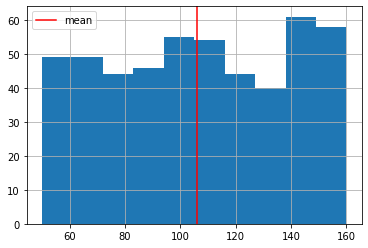

In [30]:
height_weight_data['Weight'].hist(bins=10)
plt.axvline(height_weight_data['Weight'].mean(), color="r", label='mean')
plt.legend()

In [31]:
listOfSeries = [
    pd.Series(['Male', 205, 460], index=height_weight_data.columns),
    pd.Series(['Female', 202, 390], index=height_weight_data.columns),
    pd.Series(['Female', 199, 410], index=height_weight_data.columns),
    pd.Series(['Male', 202, 390], index=height_weight_data.columns),
    pd.Series(['Female', 199, 410], index=height_weight_data.columns),
    pd.Series(['Male', 200, 410], index=height_weight_data.columns),
]

In [32]:
height_weight_data_updated = height_weight_data.append(listOfSeries, ignore_index=True)

In [33]:
height_weight_data_updated.tail()

,Gender,Height,Weight
501,Female,202,390
502,Female,199,410
503,Male,202,390
504,Female,199,410
505,Male,200,410


In [34]:
updated_weight_mean = height_weight_data_updated['Weight'].mean()
updated_weight_mean

109.62450592885375

In [35]:
height_weight_data_updated['Weight'].median()

106.5

In [36]:
height_weight_data['Weight'].median()

106.0

In [37]:
height_weight_data['Weight'].mode()

0     50
1     80
2    104
dtype: int64

In [38]:
num_records = height_weight_data.shape[0]
num_records

500

In [39]:
height_data = height_weight_data[['Height']].copy()
height_data.head()

,Height
0,174
1,189
2,185
3,195
4,149


In [40]:
weight_data = height_weight_data[['Weight']].copy()
weight_data.head()

,Weight
0,96
1,87
2,110
3,104
4,61


In [41]:
counts = [1] * num_records

In [46]:
height_data['counts_height'] = counts
weight_data['weight_data'] = counts
weight_data = weight_data.sort_values('Weight')
weight_data.tail()

,Weight,weight_data
157,160,1
330,160,1
106,160,1
204,160,1
287,160,1


In [48]:
height_data = height_data.groupby('Height', as_index=False).count()
height_data

,Height,counts_height
0,140,1
1,141,1
2,142,1
3,143,1
4,144,1
5,145,1
6,146,1
7,147,1
8,148,1
9,149,1


In [54]:
weight_data = weight_data.groupby('Weight', as_index=False).count()
weight_data.head()

,Weight,weight_data
0,50,1
1,51,1
2,52,1
3,53,1
4,54,1


In [55]:
height_data['cumsum_height'] = height_data['counts_height'].cumsum()
height_data.head(10)

,Height,counts_height,cumsum_height
0,140,1,1
1,141,1,2
2,142,1,3
3,143,1,4
4,144,1,5
5,145,1,6
6,146,1,7
7,147,1,8
8,148,1,9
9,149,1,10
